In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

%matplotlib inline

In [3]:
dataset = arff.loadarff('Autism-Child-Data.arff')
child = pd.DataFrame(dataset[0])

In [4]:
dataset = arff.loadarff('Autism-Adolescent-Data.arff')
adolescent = pd.DataFrame(dataset[0])

In [5]:
dataset = arff.loadarff('Autism-Adult-Data.arff')
adult = pd.DataFrame(dataset[0])

In [6]:
# Configuração das visualizações dos dataframes
pd.options.display.max_columns = 22
pd.options.display.max_rows = 1500

## Pré processamento base Child

### Verificamos que há dados faltantes nas colunas ethnicity e relation

In [7]:
# Subtituindo por NAN
child = child.replace(b'?', np.nan)

In [8]:
# Verificando a quantidade de itens faltantes
child.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

### 43 das 288 instâncias da base Child Autism possuem valores nulos, isso representa 14,93% das instâncias, por isso iremos substituir os valores pela mediana das instâncias.

In [9]:
child['ethnicity'].mode()

0    b'White-European'
dtype: object

In [10]:
child['ethnicity'] = child['ethnicity'].replace(np.nan, b'White-European')

In [11]:
child['relation'].mode()

0    b'Parent'
dtype: object

In [12]:
child['relation'] = child['relation'].replace(np.nan, b'Parent')

In [13]:
child.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',6.0,b'm',b'White-European',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'Parent',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',5.0,b'f',b'White-European',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'Parent',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',5.0,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [14]:
child = child.drop(child[child['age'].isnull() == True].index, axis = 0)

### Verificando dados duplicados

In [15]:
child.duplicated().value_counts()

False    286
True       2
dtype: int64

In [16]:
child.drop_duplicates(subset=None, keep= 'first', inplace=True)

### Gráfico Idade crianças

Text(0, 0.5, 'Frequency')

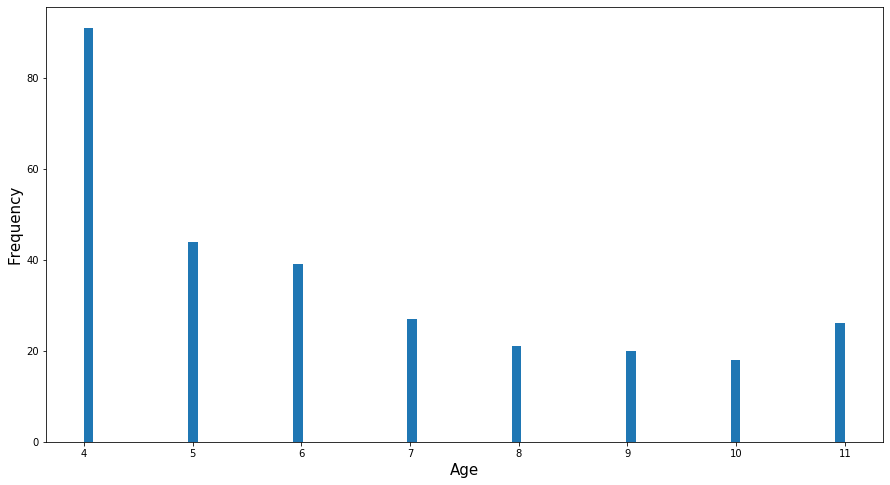

In [17]:
x_size = 15
y_size = 8
fig = (x_size, y_size)

#Parametro bins regula a espessura da barra

child['age'].hist(bins=80, grid=False, figsize=fig)

plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

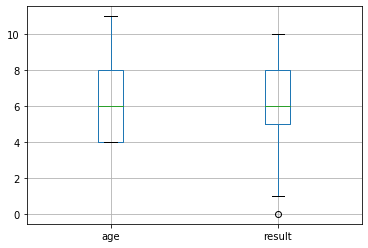

In [18]:
child.boxplot()

In [19]:
child['age_desc'] = 0

## Pré Processando Adolescent Autism

In [20]:
adolescent = adolescent.replace(b'?', np.nan)

In [21]:
adolescent.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          6
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           6
Class/ASD          0
dtype: int64

### Foram encontrados 6 instâncias que apresentam valor nulo no campo ethnicity e relation que representa 5,77% dos dados

In [22]:
adolescent['ethnicity'].mode()

0    b'White-European'
dtype: object

In [23]:
adolescent['ethnicity'] = adolescent['ethnicity'].replace(np.nan, b'White-European')

In [24]:
adolescent['relation'].mode()

0    b'Self'
dtype: object

In [25]:
adolescent['relation'] = adolescent['relation'].replace(np.nan, b'Self')

In [26]:
adolescent.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

### Verificando dados duplicados

In [27]:
adolescent.duplicated().value_counts()

False    103
True       1
dtype: int64

In [28]:
adolescent.drop_duplicates(subset=None, keep= 'first', inplace=True)

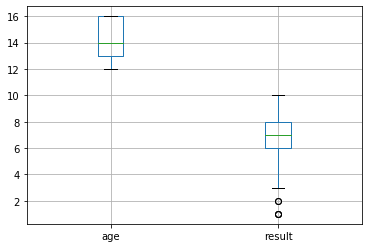

In [29]:
adolescent.boxplot()

### Gráfico Idade Adolescente

Text(0, 0.5, 'Frequency')

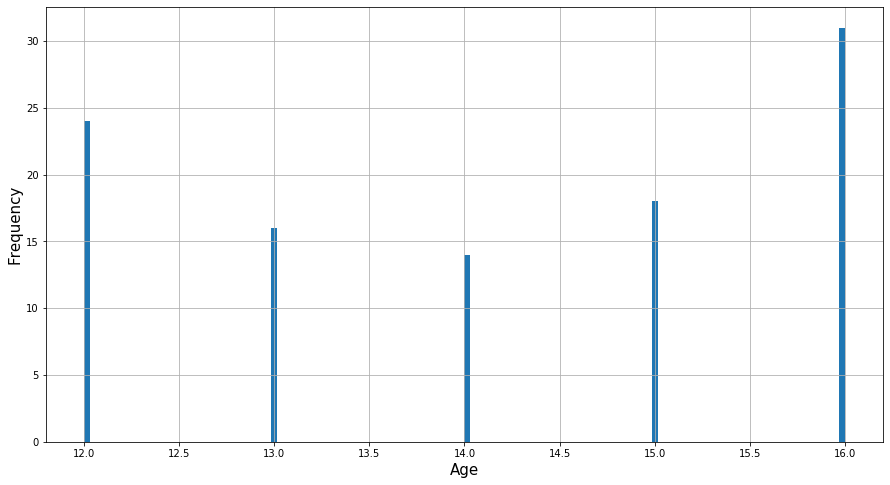

In [30]:
x_size = 15
y_size = 8
fig = (x_size, y_size)

adolescent['age'].plot(kind = 'hist', bins=130, grid=True, figsize=fig)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

In [31]:
adolescent['age'].value_counts()

16.0    31
12.0    24
15.0    18
13.0    16
14.0    14
Name: age, dtype: int64

In [32]:
adolescent.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'0',b'0',b'0',b'1',b'1',b'1',b'1',b'1',b'1',b'0',15.0,b'm',b'Hispanic',b'yes',b'yes',b'Austria',b'no',6.0,b'12-16 years',b'Parent',b'NO'
1,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',15.0,b'm',b'Black',b'no',b'no',b'Austria',b'no',2.0,b'12-16 years',b'Relative',b'NO'
2,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',12.0,b'f',b'White-European',b'no',b'no',b'AmericanSamoa',b'no',2.0,b'12-16 years',b'Self',b'NO'
3,b'0',b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'0',14.0,b'f',b'White-European',b'no',b'no',b'United Kingdom',b'no',7.0,b'12-16 years',b'Self',b'YES'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'0',16.0,b'f',b'White-European',b'no',b'no',b'Albania',b'no',7.0,b'12-16 years',b'Self',b'YES'


In [33]:
adolescent['age_desc'] = 1

## Pré processamento Adult Altism

### Foram identificadas 95 instâncias com itens faltantes, representando 13,49% das amostras

In [34]:
adult = adult.replace(b'?', np.nan)

In [35]:
adult.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [36]:
adult['ethnicity'].mode()

0    b'White-European'
dtype: object

In [37]:
adult['ethnicity'] = adult['ethnicity'].replace(np.nan, b'White-European')

In [38]:
adult['relation'].mode()

0    b'Self'
dtype: object

In [39]:
adult['relation'] = adult['relation'].replace(np.nan, b'Self')

In [40]:
adult.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [41]:
adult = adult.drop(adult[adult['age'].isnull() == True].index, axis = 0)

In [42]:
adult.duplicated().value_counts()

False    697
True       5
dtype: int64

In [43]:
adult.drop_duplicates(subset=None, keep= 'first', inplace=True)

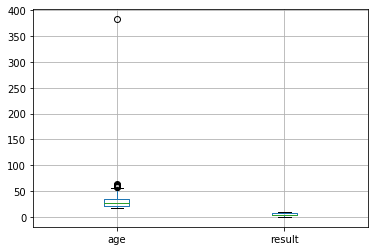

In [44]:
adult.boxplot()

In [45]:
adult['age_desc'] = 2

### Removendo outlier de idade

In [46]:
adult['age'].nlargest(2)

52    383.0
7      64.0
Name: age, dtype: float64

In [47]:
adult = adult.drop(52, axis = 0)

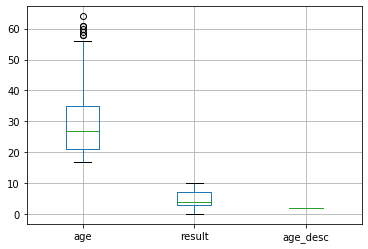

In [48]:
adult.boxplot()

### Distribuição das idades Adulto

Text(0, 0.5, 'Frequency')

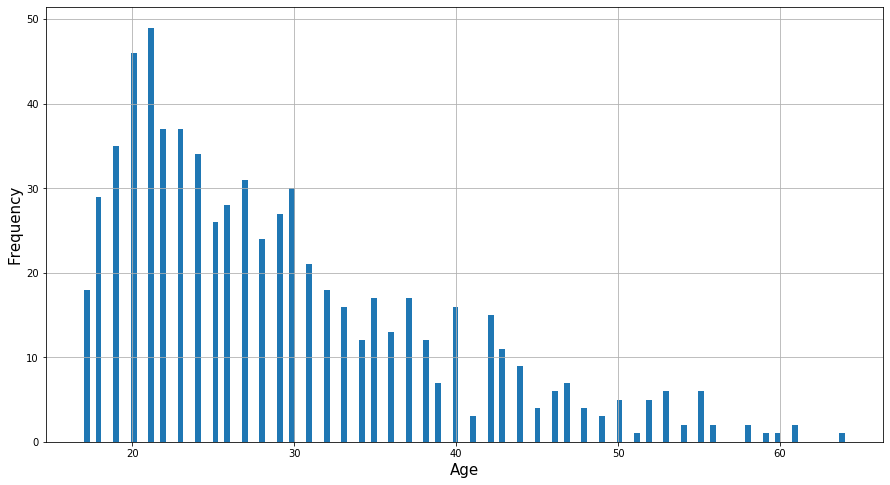

In [49]:
x_size = 15
y_size = 8
fig = (x_size, y_size)

adult['age'].plot(kind = 'hist', bins=130, grid=True, figsize=fig)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

### Balanceamento Criança

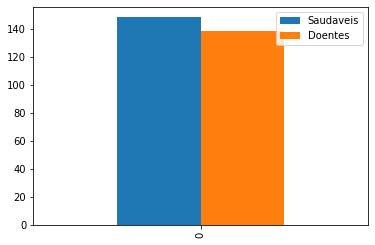

In [50]:
from sklearn.preprocessing import LabelEncoder

#Transforma a coluna em binario
child['Class/ASD'] = LabelEncoder().fit_transform(child['Class/ASD'])

#Conta o numero de ocorrencias
Saudaveis = child['Class/ASD'].isin([0]).sum()
Doentes = child['Class/ASD'].isin([1]).sum()

#Cria uma lista
histogram = {'Saudaveis' : Saudaveis, 'Doentes' : Doentes}

#Converte para um df
df_histogram = pd.DataFrame([histogram])

df_histogram.plot.bar()

### Podemos verificar que a base está desbalanceada, há 148 instâncias saudaveis e 138 instâncias doentes, iremos fazer um downsample.

In [51]:
values = child['Class/ASD'].value_counts()
values

0    148
1    138
Name: Class/ASD, dtype: int64

In [52]:
#Obtendo os parametros de forma 'automatica'
min_ = values.min()
max_ = values.max()

index_min = values.idxmin()
index_max = values.idxmax()

In [53]:
dataset_minority = child[child['Class/ASD'] == index_min]
dataset_majority = child[child['Class/ASD'] == index_max]

In [54]:
from sklearn.utils import resample

dataset_majority_downsampled = resample(dataset_majority, replace = False, n_samples = min_, random_state = 123)

child = pd.concat([dataset_majority_downsampled, dataset_minority])

In [55]:
child['Class/ASD'].value_counts()

1    138
0    138
Name: Class/ASD, dtype: int64

### Balanceando Adolescente

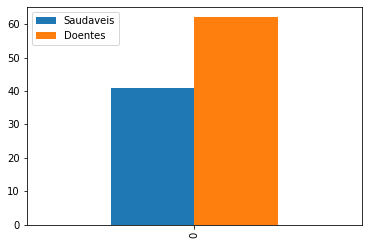

In [56]:
#Transforma a coluna em binario
adolescent['Class/ASD'] = LabelEncoder().fit_transform(adolescent['Class/ASD'])

#Conta o numero de ocorrencias
Saudaveis = adolescent['Class/ASD'].isin([0]).sum()
Doentes = adolescent['Class/ASD'].isin([1]).sum()

#Cria uma lista
histogram = {'Saudaveis' : Saudaveis, 'Doentes' : Doentes}

#Converte para um df
df_histogram = pd.DataFrame([histogram])

df_histogram.plot.bar()

### Podemos verificar que a base está desbalanceada, há 41 instâncias saudaveis e 62 instâncias doentes, iremos fazer um downsample.


In [57]:
values = adolescent['Class/ASD'].value_counts()

values

1    62
0    41
Name: Class/ASD, dtype: int64

In [58]:
#Obtendo os parametros de forma 'automatica'
min_ = values.min()
max_ = values.max()

index_min = values.idxmin()
index_max = values.idxmax()

In [59]:
dataset_minority = adolescent[adolescent['Class/ASD'] == index_min]
dataset_majority = adolescent[adolescent['Class/ASD'] == index_max]

In [60]:
dataset_majority_downsampled = resample(dataset_majority, replace = False, n_samples = min_, random_state = 123)

adolescent = pd.concat([dataset_majority_downsampled, dataset_minority])

In [61]:
adolescent['Class/ASD'].value_counts()

1    41
0    41
Name: Class/ASD, dtype: int64

### Balanceando Adulto

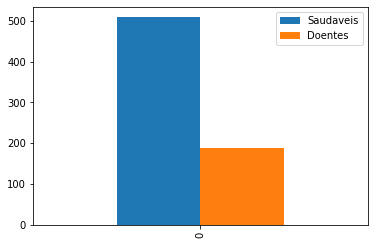

In [62]:
#Transforma a coluna em binario
adult['Class/ASD'] = LabelEncoder().fit_transform(adult['Class/ASD'])

#Conta o numero de ocorrencias
Saudaveis = adult['Class/ASD'].isin([0]).sum()
Doentes = adult['Class/ASD'].isin([1]).sum()

#Cria uma lista
histogram = {'Saudaveis' : Saudaveis, 'Doentes' : Doentes}

#Converte para um df
df_histogram = pd.DataFrame([histogram])

df_histogram.plot.bar()

### Podemos verificar que a base está desbalanceada, há 509 instâncias saudaveis e 187 instâncias doentes, iremos fazer um downsample.


In [63]:
values = adult['Class/ASD'].value_counts()

values

0    509
1    187
Name: Class/ASD, dtype: int64

In [64]:
#Obtendo os parametros de forma 'automatica'
min_ = values.min()
max_ = values.max()

index_min = values.idxmin()
index_max = values.idxmax()

In [65]:
dataset_minority = adult[adult['Class/ASD'] == index_min]
dataset_majority = adult[adult['Class/ASD'] == index_max]

In [66]:
dataset_majority_downsampled = resample(dataset_majority, replace = False, n_samples = min_, random_state = 123)

adult = pd.concat([dataset_majority_downsampled, dataset_minority])

In [67]:
adult['Class/ASD'].value_counts()

1    187
0    187
Name: Class/ASD, dtype: int64

# Unindo os Datasets

In [68]:
df = pd.concat([child,adolescent,adult])

In [69]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
176,b'1',b'0',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'0',8.0,b'm',b'White-European',b'no',b'no',b'United Kingdom',b'yes',4.0,0,b'Parent',0
248,b'0',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'0',b'1',7.0,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',3.0,0,b'Parent',0
247,b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',10.0,b'm',b'Middle Eastern ',b'no',b'yes',b'United Arab Emirates',b'no',1.0,0,b'Parent',0
212,b'0',b'1',b'1',b'0',b'1',b'1',b'0',b'0',b'0',b'1',4.0,b'm',b'White-European',b'yes',b'no',b'Malaysia',b'no',5.0,0,b'Parent',0
71,b'0',b'1',b'0',b'0',b'1',b'0',b'1',b'0',b'0',b'1',7.0,b'f',b'White-European',b'yes',b'no',b'United Kingdom',b'no',4.0,0,b'Parent',0


### Mudando valores binários para inteiro

In [70]:
columns_score = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

In [71]:
df[columns_score] = df[columns_score].apply(pd.to_numeric)

In [72]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
176,1,0,1,1,1,0,0,0,0,0,8.0,b'm',b'White-European',b'no',b'no',b'United Kingdom',b'yes',4.0,0,b'Parent',0
248,0,0,1,0,0,0,1,0,0,1,7.0,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',3.0,0,b'Parent',0
247,0,0,0,0,0,0,1,0,0,0,10.0,b'm',b'Middle Eastern ',b'no',b'yes',b'United Arab Emirates',b'no',1.0,0,b'Parent',0
212,0,1,1,0,1,1,0,0,0,1,4.0,b'm',b'White-European',b'yes',b'no',b'Malaysia',b'no',5.0,0,b'Parent',0
71,0,1,0,0,1,0,1,0,0,1,7.0,b'f',b'White-European',b'yes',b'no',b'United Kingdom',b'no',4.0,0,b'Parent',0


## Realizando label encoder

In [73]:
# Label encoder gender
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [74]:
#0 Feminino
#1 Masculino
df['gender'].unique()

array([1, 0], dtype=int64)

0. Asian
1. Black
2. Hispanic
3. Latino
4. Middle Eastern
5. Others
6. Pasifika
7. South Asian
8. Turkish
9. White-European

In [75]:
# Label encoder ethnicity
ethnicity = LabelEncoder().fit_transform(df['ethnicity'])

In [76]:
df['ethnicity'] = LabelEncoder().fit_transform(ethnicity)

In [77]:
# Label encoder jundice
# 0. NO
# 1. YES

df['jundice'] = LabelEncoder().fit_transform(df['jundice'])

In [78]:
# Label encoder austim
# 0. NO
# 1. YES
df['austim'] = LabelEncoder().fit_transform(df['austim'])

In [79]:
df['relation'].unique()

array([b'Parent', b'Health care professional', b'Relative', b'Self',
       b'self', b'Others'], dtype=object)

In [80]:
df['relation'] = df['relation'].replace(b'self', b'Self')

In [81]:
df['relation'].unique()

array([b'Parent', b'Health care professional', b'Relative', b'Self',
       b'Others'], dtype=object)

In [82]:
# Label encoder used_app_before
# 0. Health Care Professional
# 1. Others
# 2. Parent
# 3. Relative
# 4. Self

df['relation'] = LabelEncoder().fit_transform(df['relation'])

In [83]:
df['relation'].unique()

array([2, 0, 3, 4, 1], dtype=int64)

In [84]:
df['result'] = LabelEncoder().fit_transform(df['result'])

In [85]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
176,1,0,1,1,1,0,0,0,0,0,8.0,1,9,0,0,b'United Kingdom',b'yes',4,0,2,0
248,0,0,1,0,0,0,1,0,0,1,7.0,1,4,0,0,b'Jordan',b'no',3,0,2,0
247,0,0,0,0,0,0,1,0,0,0,10.0,1,4,0,1,b'United Arab Emirates',b'no',1,0,2,0
212,0,1,1,0,1,1,0,0,0,1,4.0,1,9,1,0,b'Malaysia',b'no',5,0,2,0
71,0,1,0,0,1,0,1,0,0,1,7.0,0,9,1,0,b'United Kingdom',b'no',4,0,2,0


# Visualização dos Dados

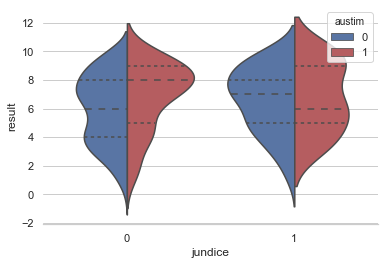

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=df, split=True,
                inner="quart", palette={1: "r", 0: "b"})
sns.despine(left=True)

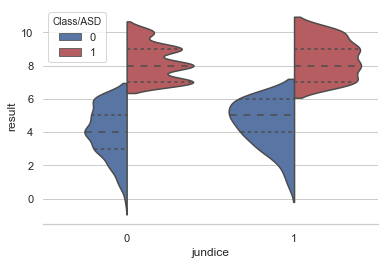

In [87]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=df, split=True,
                inner="quart", palette={1: "r", 0: "b"})
sns.despine(left=True)

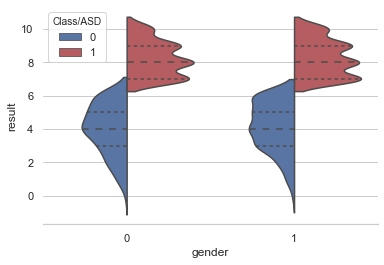

In [88]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=df, split=True,
                inner="quart", palette={1: "r", 0: "b"})
sns.despine(left=True)

### Country of Residence: Este atributo não fornece nenhuma informação importante para a acurácia das predições, portanto podemos removê-la.
### Used App Before: Este atributo informa se o individuo já utilizou aplicações em tela ou não. Esta variável não fornece informações significantes para a classificação alvo, portanto iremos removê-la.
### Result: Result é o resultado da pontuação do indivíduo no teste, se incluímos esta informação o algoritmo de aprendizagem de máquina essencialmente saberia o resultado da classe. Então iremos removê-la. 
    

In [89]:
df.drop('contry_of_res', axis = 1, inplace = True)
df.drop('used_app_before', axis = 1, inplace = True)
df.drop('result', axis = 1, inplace = True)

### Normalizando

In [90]:
from sklearn import preprocessing

#Get labels
labels = df.columns

# Create x, where x the 'scores' column's values as floats
x = df.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

#Rename columns
df_normalized.columns = labels

In [91]:
df_normalized.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,age_desc,relation,Class/ASD
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.066667,1.0,1.000000,0.0,0.0,0.0,0.5,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.050000,1.0,0.444444,0.0,0.0,0.0,0.5,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.100000,1.0,0.444444,0.0,1.0,0.0,0.5,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.000000,1.0,0.0,0.0,0.5,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.050000,0.0,1.000000,1.0,0.0,0.0,0.5,0.0


# Modelos

In [92]:
x = df_normalized.drop('Class/ASD', axis = 1)
y = df_normalized['Class/ASD']

In [93]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

# KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
y_pred = classifier.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.values, y_pred)
matrix = pd.DataFrame(cm, index = ['Saudavel', 'Doente'], columns = ['Saudavel', 'Doente'])
matrix

,Saudavel,Doente
Saudavel,57,8
Doente,2,80


In [97]:
from sklearn.metrics import accuracy_score

ac_score = accuracy_score(y_test, y_pred)

print(ac_score)

0.9319727891156463


In [98]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_pred)

print(f1score)

0.9411764705882352


In [99]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier, x_test, y_test, cv=10).mean()

0.8716666666666665

# SVM

In [100]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 'scale')

classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [101]:
y_pred = classifier.predict(x_test)

In [102]:
cm = confusion_matrix(y_test.values, y_pred)
matrix = pd.DataFrame(cm, index = ['Saudavel', 'Doente'], columns = ['Saudavel', 'Doente'])
matrix

,Saudavel,Doente
Saudavel,64,1
Doente,2,80


In [103]:
ac_score = accuracy_score(y_test, y_pred)

print(ac_score)

0.9795918367346939


In [104]:
f1score = f1_score(y_test, y_pred)

print(f1score)

0.9815950920245398


In [105]:
cross_val_score(classifier, x_test, y_test, cv=10).mean()

0.9260714285714287

# Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [107]:
y_pred = classifier.predict(x_test)

In [108]:
cm = confusion_matrix(y_test.values, y_pred)
matrix = pd.DataFrame(cm, index = ['Saudavel', 'Doente'], columns = ['Saudavel', 'Doente'])
matrix

,Saudavel,Doente
Saudavel,64,1
Doente,4,78


In [109]:
ac_score = accuracy_score(y_test, y_pred)

print(ac_score)

0.9659863945578231


In [110]:
f1score = f1_score(y_test, y_pred)

print(f1score)

0.968944099378882


In [111]:
cross_val_score(classifier, x_test, y_test, cv=10).mean()

0.8577976190476191